In [63]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [64]:
# Importing the GEOIDS and neighborhood datasets to map datasets to the neighborhood in Boston
# Please replace with proper file paths 
neighborhoods = pd.read_csv(r'C:\Users\Car_1\OneDrive\Desktop\CS_Classes\cs506\Building Violations Work\Project Extension Spatial Data for census datasets\block group level files\AggregatedGEOIDs.csv')
geoid_areas = pd.read_csv(r'C:\Users\Car_1\OneDrive\Desktop\CS_Classes\cs506\Building Violations Work\Project Extension Spatial Data for census datasets\block group level files\GeoIDAreas.csv')

In [65]:
# Analyzing and Setting up the GEOID and neighborhood datasets to right types for for analysis

#pandas Display setting 
pd.set_option('display.max_columns', 10)  # Limit the number of displayed columns
pd.set_option('display.width', 200)       # Set the display width to avoid wrapping
pd.set_option('display.max_colwidth', 50) # Truncate columns to 50 characters
pd.set_option('display.max_rows', 10)


# Display the first few rows of the dataset
print(neighborhoods.head())
print(geoid_areas.head())
# Get summary statistics of the dataset
print(neighborhoods.describe())
print(geoid_areas.describe())

# Describe the column types
print("geoid_areas Types: \n" , geoid_areas.dtypes)
# Describe the column types
print("Neighborhoods Column Types:\n",  neighborhoods.dtypes)


#Converting to the right datatypes
geoid_areas['GEOID'] = geoid_areas['GEOID'].astype(str)
#geoid_areas['GEOID'] = geoid_areas['GEOID'].str.split('.').str[0]
geoid_areas['Neighborhood'] = geoid_areas['Neighborhood'].astype(str)
geoid_areas['Area'] = geoid_areas['Area'].astype(float)


neighborhoods['Neighborhood'] = neighborhoods['Neighborhood'].astype(str)
neighborhoods['GEOIDs'] = neighborhoods['GEOIDs'].astype(str)


#Verifying changes
print("updated geoid_areas Types: \n" , geoid_areas.dtypes)
print("updated Neighborhoods Column Types:\n",  neighborhoods.dtypes)

# Let's print a small sample of actual data for 'GEOID' and 'Neighborhood' to confirm they look correct
print("\nSample data for geoid_areas:")
print(geoid_areas.head())
print("\nSample data for neighborhoods:")
print(neighborhoods.head())





# Cleaning the GEOID_areas dataset so that only the maximum area for each GEOID is retained
print("\n Cleaning Areas dataset:\n")

geoid_areas_sorted = geoid_areas.sort_values(by=['GEOID', 'Area'], ascending=[True, False])
geoid_areas_cleaned = geoid_areas_sorted.drop_duplicates(subset='GEOID', keep='first')
geoid_areas_cleaned = geoid_areas_cleaned.reset_index(drop=True)
geoid_areas_cleaned.head()
#looking at the cleaned dataset
print ("Verifying the cleaned Areas dataset")
print(geoid_areas_cleaned.head(10))
print(geoid_areas_cleaned.describe())
unique_geoids = geoid_areas_cleaned['GEOID'].unique()
unique_geoid_count = len(unique_geoids)
print(f"There are {unique_geoid_count} unique GEOID values after cleaning.")

#Setting the cleaned areas dataset to the original dataset
geoid_areas = geoid_areas_cleaned



  Neighborhood                                             GEOIDs
0      Allston  "250250006012,250250007014,250250007042,250250...
1     Back Bay  "250250104053,250250105002,250250106001,250250...
2  Beacon Hill  "250259817001,250250702012,250250202003,250250...
3     Brighton  "250250005022,250250005021,250250005024,250250...
4  Charlestown  "250250404012,250250401001,250250408013,250250...
          GEOID             Neighborhood        Area
0  250250612041             South Boston       0.006
1  250250612041  South Boston Waterfront  470051.778
2  250250701042                Chinatown       0.001
3  250250701042                 Downtown  308629.811
4  250250701043                Chinatown       0.001
       Neighborhood                                             GEOIDs
count            24                                                 24
unique           24                                                 24
top         Allston  "250250006012,250250007014,250250007042,250250...
fr

In [66]:
# Verifying the cleaned dataset mapped things correctly by checking GEOIDS of small neighborhoods 
longwood_entries = geoid_areas[geoid_areas['Neighborhood'] == 'Longwood']
print("Longwood entries:")
print(longwood_entries.head())




Longwood entries:
            GEOID Neighborhood        Area
77   250250103002     Longwood  360526.788
281  250250810015     Longwood  275977.215


In [67]:
# Beginning to work on datasets that include the GEOID data: PREPPING THE CENSUS DATA

# Importing the census data from the BOSTON.GOV SITE AT THE BLOCK LEVEL 
census2020 = pd.read_csv(r"C:\Users\Car_1\OneDrive\Desktop\CS_Classes\cs506\Building Violations Work\Project Extension Datasets\census-block-group-data.csv")

# Display the first few rows of the dataset
print(census2020.head())


#Dropping Unnecessary columns with unusubale data
census2020 = census2020.drop(columns=['FILEID', 'STUSAB','SUMLEV','GEOCODE','REGION', 'DIVISION', 'STATE', 'COUNTY', 'COUSUB','GEOID_20_BG', 'P0040001','P0040005',	'P0040006',	'P0040002',	'P0040008',	'P0040007',	'P0040009',	'P0040010',	'P0040011'])

# Renaming 

# Convert the column names to use the names in the first row instead of the default column names
census2020.columns = census2020.iloc[0]
census2020 = census2020[1:]
new_column_names = [
    'GEOID', 'Census Tract', 'Block Group', 'Total_Race', 
    'White alone', 'Black or African American alone', 'Hispanic or Latino', 'Asian alone', 
    'American Indian and Alaska Native alone', 'Native Hawaiian and Other Pacific Islander alone', 
    'Some Other Race alone', 'Population of two or more races', 'Total_GroupQuarters',
    'Institutionalized population', 'Correctional facilities for adults', 'Juvenile facilities', 
    'Nursing facilities/Skilled-nursing facilities', 'Other institutional facilities', 
    'Noninstitutionalized population', 'College/University student housing', 'Military quarters', 
    'Other noninstitutional facilities', 'Total_OccupancyStatus', 'Occupied', 'Vacant'
]
census2020.columns = new_column_names

#Trimming the GEOID to the last 12 characters
census2020['GEOID'] = census2020['GEOID'].str[-12:]


#viewing the column names again and datatypes
print(census2020.head())
print(census2020.columns)
print(census2020.dtypes)

#converting columns to the right datatypes
census2020.iloc[:, 3:] = census2020.iloc[:, 3:].apply(pd.to_numeric, errors='coerce')
# dropping second and thrid column 
census2020 = census2020.drop(columns=['Census Tract', 'Block Group'])



          FILEID                        STUSAB         SUMLEV                         GEOID                     GEOCODE  ...           P0050009                           P0050010 H0010001  H0010002  \
0  field concept  State/US-Abbreviation (USPS)  Summary Level  Geographic Record Identifier  Geographic Code Identifier  ...  Military quarters  Other noninstitutional facilities   Total:  Occupied   
1           PLST                            MA            150         1500000US250250001011                    2.50E+11  ...                  0                                  0      422       407   
2           PLST                            MA            150         1500000US250250001012                    2.50E+11  ...                  0                                 10      304       290   
3           PLST                            MA            150         1500000US250250001021                    2.50E+11  ...                  0                                  4      383       36

In [68]:
# MERGING THE CENSUS DATA WITH THE GEOID DATA

census_m = pd.merge(geoid_areas, census2020, on='GEOID', how='inner')
print(census_m.head(15))


#Agreegating the data to the neighborhood level
print (" \n Aggregating the data to the neighborhood level : \n")
census_agg = census_m.groupby('Neighborhood', as_index = False).sum()
census_agg = census_agg.drop(columns=['Area'])
print(census_agg.head())
census_agg.describe()
#looking for dorcehster
dorchester_entries = census_agg[census_agg['Neighborhood'] == 'Dorchester']
print("Dorchester entries:")
print(dorchester_entries.head())



           GEOID Neighborhood        Area Total_Race White alone  ... Military quarters Other noninstitutional facilities Total_OccupancyStatus Occupied Vacant
0   250250001011      Allston  140302.135       1052         643  ...                 0                                 0                   422      407     15
1   250250001012      Allston  109622.620        824         568  ...                 0                                10                   304      290     14
2   250250001021     Brighton  171144.841       1020         565  ...                 0                                 4                   383      365     18
3   250250001022     Brighton  896290.632       2694        1000  ...                 0                                 6                  1312     1241     71
4   250250002011     Brighton  240993.317        966         650  ...                 0                                 0                   361      354      7
..           ...          ...         ..

In [69]:
# Educational Attainment Dataset SETUP 

# this dataset has an individual license, so it is not included in the repository but it is readily available at IPUMS for download
# the dataset is Steven Manson, Jonathan Schroeder, David Van Riper, Katherine Knowles, Tracy Kugler, Finn Roberts, and Steven Ruggles.
        #IPUMS National Historical Geographic Information System: Version 18.0 
        #[#dataset]. Minneapolis, MN: IPUMS. 2023.
        #http://doi.org/10.18128/D050.V18.0

# the table on IPUMS  is called " Table: B15003. Educational Attainment for the Population 25 Years and Over" 
#"the data used pertains to the 2022 American Community Survey: 5-Year Data [2018-2022, Block Groups & Larger Areas]"


# Importing the educational attainment data from the IPUMS dataset. Note that some prior cleaning was done on excel to some remove unnecessary columns and rows

education = pd.read_csv(r"C:\Users\Car_1\OneDrive\Desktop\CS_Classes\cs506\Building Violations Work\Project Extension Datasets\IPUMS_NHGIS_Educational_attainment_data\educational_attainment.csv")

# Display the first few rows of the dataset
print(education.head())
#Showing the column names
print(education.columns)
#Updating the column names for readability using the codebook from IPUMS
rename_dict = {
    "AQPKE001": "Total_e",
    "AQPKE002": "No schooling completed_e",
    "AQPKE003": "Nursery school_e",
    "AQPKE004": "Kindergarten_e",
    "AQPKE005": "1st grade_e",
    "AQPKE006": "2nd grade_e",
    "AQPKE007": "3rd grade_e",
    "AQPKE008": "4th grade_e",
    "AQPKE009": "5th grade_e",
    "AQPKE010": "6th grade_e",
    "AQPKE011": "7th grade_e",
    "AQPKE012": "8th grade_e",
    "AQPKE013": "9th grade_e",
    "AQPKE014": "10th grade_e",
    "AQPKE015": "11th grade_e",
    "AQPKE016": "12th grade, no diploma_e",
    "AQPKE017": "Regular high school diploma_e",
    "AQPKE018": "GED or alternative credential_e",
    "AQPKE019": "Some college, less than 1 year_e",
    "AQPKE020": "Some college, 1 or more years, no degree_e",
    "AQPKE021": "Associate's degree_e",
    "AQPKE022": "Bachelor's degree_e",
    "AQPKE023": "Master's degree_e",
    "AQPKE024": "Professional school degree_e",
    "AQPKE025": "Doctorate degree_e",
    "AQPKM001": "Total_me",
    "AQPKM002": "No schooling completed_me",
    "AQPKM003": "Nursery school_me",
    "AQPKM004": "Kindergarten_me",
    "AQPKM005": "1st grade_me",
    "AQPKM006": "2nd grade_me",
    "AQPKM007": "3rd grade_me",
    "AQPKM008": "4th grade_me",
    "AQPKM009": "5th grade_me",
    "AQPKM010": "6th grade_me",
    "AQPKM011": "7th grade_me",
    "AQPKM012": "8th grade_me",
    "AQPKM013": "9th grade_me",
    "AQPKM014": "10th grade_me",
    "AQPKM015": "11th grade_me",
    "AQPKM016": "12th grade, no diploma_me",
    "AQPKM017": "Regular high school diploma_me",
    "AQPKM018": "GED or alternative credential_me",
    "AQPKM019": "Some college, less than 1 year_me",
    "AQPKM020": "Some college, 1 or more years, no degree_me",
    "AQPKM021": "Associate's degree_me",
    "AQPKM022": "Bachelor's degree_me",
    "AQPKM023": "Master's degree_me",
    "AQPKM024": "Professional school degree_me",
    "AQPKM025": "Doctorate degree_me"
}
education = education.rename(columns=rename_dict)


#Checking the column names
print(education.columns)
#dropping some columns that are not useful for the analysis
education = education.drop(columns=['TL_GEO_ID'])
# reformatting the GEOID to match the other datasets
education['GEOID'] = education['GEO_ID'].str[-12:]
education = education.drop(columns=['GEO_ID'])
# Showing the renamed dataframe columns
education.head()

#Verifying data types 
print(education.dtypes)

# Merging the educational attainment data with the GEOID data
education_m = pd.merge(geoid_areas, education, on='GEOID', how='inner')
#dropping the area column as it is not needed for the analysis
education_m = education_m.drop(columns=['Area'])


#Verifying values 
print(education_m.describe())
#Verifying longwood only has two entries 
longwood_entries = education_m[education_m['Neighborhood'] == 'Longwood']
print("Longwood entries:")
print(longwood_entries.head())


#Aggregating data at the neighborhood level 
education_agg = education_m.groupby('Neighborhood', as_index=False).sum()

# Looking at the merged dataset
#checking on longwoods
longwood_entries = education_agg[education_agg['Neighborhood'] == 'Dorchester']
print("Longwood entries:")
print(longwood_entries.head())
#print(education_agg.columns)


education_agg.head(25)


                  GEO_ID     TL_GEO_ID  AQPKE001  AQPKE002  AQPKE003  ...  AQPKM021  AQPKM022  AQPKM023  AQPKM024  AQPKM025
0  1500000US250250001011  2.502500e+11       618         0         0  ...        18        87        76        33       123
1  1500000US250250001012  2.502500e+11       544         0         0  ...        42       114       111        19        51
2  1500000US250250001021  2.502500e+11       798         0         0  ...        14       258       135        14        27
3  1500000US250250001022  2.502500e+11      2209       147         0  ...        61       744        95        15        24
4  1500000US250250002011  2.502500e+11       746        16         0  ...        77        72        49        27        40

[5 rows x 52 columns]
Index(['GEO_ID', 'TL_GEO_ID', 'AQPKE001', 'AQPKE002', 'AQPKE003', 'AQPKE004', 'AQPKE005', 'AQPKE006', 'AQPKE007', 'AQPKE008', 'AQPKE009', 'AQPKE010', 'AQPKE011', 'AQPKE012', 'AQPKE013', 'AQPKE014',
       'AQPKE015', 'AQPKE016', 'AQP

,Neighborhood,GEOID,Total_e,No schooling completed_e,Nursery school_e,...,Associate's degree_me,Bachelor's degree_me,Master's degree_me,Professional school degree_me,Doctorate degree_me
0,Allston,2502500010112502500010122502500060112502500060...,15069,241,0,...,699,3326,2311,813,1082
1,Back Bay,2502501010412502501050012502501050022502501050...,13702,32,0,...,408,2485,1732,1078,809
2,Beacon Hill,2502502010112502502010122502502010132502502010...,6886,3,0,...,236,1316,887,512,591
3,Brighton,2502500010212502500010222502500020112502500020...,32492,669,0,...,1239,6754,3845,1802,1544
4,Charlestown,2502504010012502504010022502504020012502504020...,15026,142,0,...,479,1983,1584,967,475
...,...,...,...,...,...,...,...,...,...,...,...
19,South Boston,2502506010112502506010122502506010132502506010...,29130,209,0,...,1023,6158,2938,1583,1089
20,South Boston Waterfront,2502506060212502506060312502506060412502506060...,4857,0,0,...,129,682,606,271,464
21,South End,2502507030112502507030122502507030212502507030...,23804,767,0,...,960,3042,2226,1899,1129
22,West End,2502502030112502502030412502502030422502502030...,6278,69,0,...,210,1063,717,396,267


In [70]:
# Analyzing the census_m and education_m datasets to find info on the neighborhoods

#Drop the GEOID column from the education_m dataset since it concatenates weirdly with the neighborhood column
education_agg = education_agg.drop(columns=['GEOID'])
census_agg = census_agg.drop(columns=['GEOID'])


#veryfying the aggregation
print("\n Education Aggregation: \n")
print(education_agg.head())
print("\census Aggregation: \n")
print(census_agg.head())


 Education Aggregation: 

  Neighborhood  Total_e  No schooling completed_e  Nursery school_e  Kindergarten_e  ...  Associate's degree_me  Bachelor's degree_me  Master's degree_me  Professional school degree_me  \
0      Allston    15069                       241                 0               0  ...                    699                  3326                2311                            813   
1     Back Bay    13702                        32                 0               0  ...                    408                  2485                1732                           1078   
2  Beacon Hill     6886                         3                 0               0  ...                    236                  1316                 887                            512   
3     Brighton    32492                       669                 0              74  ...                   1239                  6754                3845                           1802   
4  Charlestown    15026          

  Neighborhood  Total_e  No schooling completed_e  Nursery school_e  Kindergarten_e  ...  Highschool or General_ed_e  Highschool or General_ed_e%  Bachelor's degree_e%  Master's degree_e%  \
0      Allston    15069                       241                 0               0  ...                        1342                     8.905700             42.345212           24.766076   
1     Back Bay    13702                        32                 0               0  ...                         542                     3.955627             41.497592           27.120128   
2  Beacon Hill     6886                         3                 0               0  ...                         121                     1.757188             43.944235           23.961661   
3     Brighton    32492                       669                 0              74  ...                        3418                    10.519512             40.486889           20.715869   
4  Charlestown    15026                      

C:\Users\Car_1\AppData\Local\Temp\ipykernel_19572\2160939313.py:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x2000 with 0 Axes>

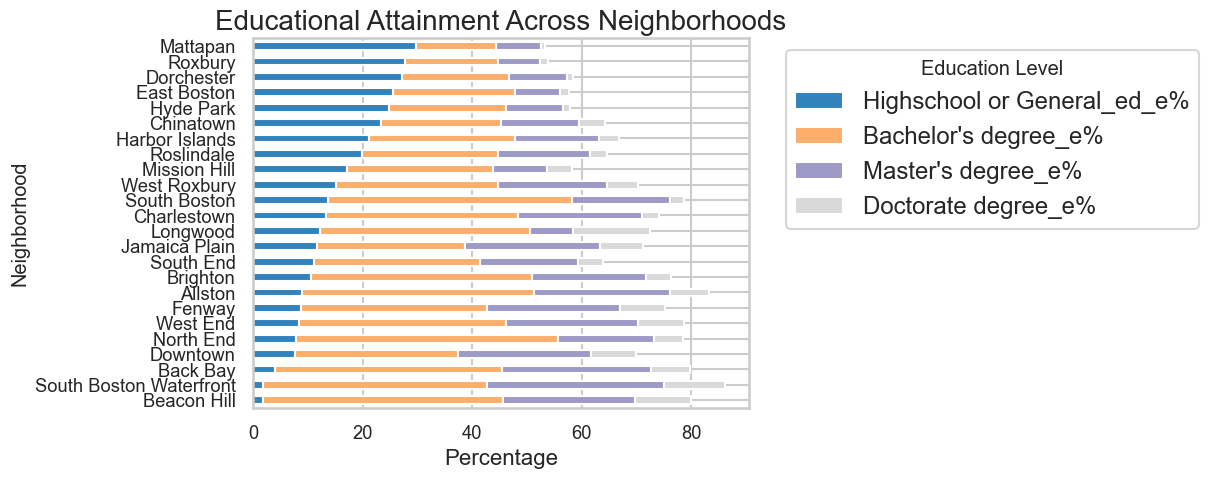

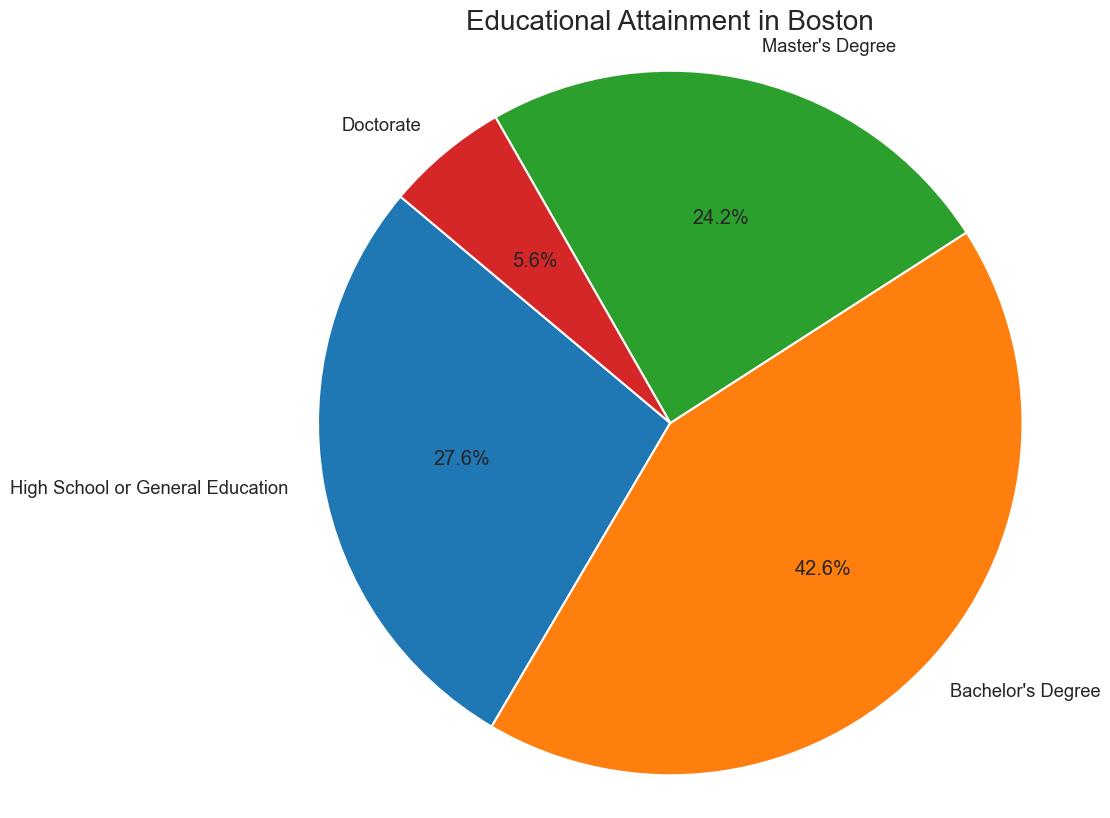

In [92]:
# Making interesting charts to show the data from the education_agg dataset

import matplotlib.pyplot as plt
import seaborn as sns

education_agg_copy = education_agg.copy()

# making a column for the general_ed + bachelors 
education_agg_copy['Highschool or General_ed_e'] = education_agg_copy['Regular high school diploma_e'] + education_agg_copy["GED or alternative credential_e"]


# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Calculate percentages
for column in ['Highschool or General_ed_e', "Bachelor's degree_e", "Master's degree_e", 'Doctorate degree_e']:
    education_agg_copy[column+'%'] = education_agg_copy[column] / education_agg_copy['Total_e'] * 100


print(education_agg_copy.head())


# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Sort the data by the total percentage to give an order to the neighborhoods
education_agg_copy = education_agg_copy.sort_values(by='Highschool or General_ed_e%', ascending=True)

# Adjust the figure size to ensure that each neighborhood label has enough space
plt.figure(figsize=(12, 20))  # The width is 12 inches, and height is 20 inches

# Plot the data
ax = education_agg_copy.set_index('Neighborhood')[['Highschool or General_ed_e%', "Bachelor's degree_e%", "Master's degree_e%", 'Doctorate degree_e%']].plot(kind='barh', stacked=True, colormap='tab20c')

# Adjust the legend
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='large')

# Set the title and labels with an increased font size for readability
plt.xlabel('Percentage', fontsize=16)
plt.title('Educational Attainment Across Neighborhoods', fontsize=20)

# Optimize space to display neighborhood names without overlap
plt.tight_layout()

# Show the plot
plt.show()



# making another plot for Boston as a whole
# Calculate the total population and the percentage of each education level
total_population = education_agg_copy['Total_e'].sum()
total_highschool = education_agg_copy['Highschool or General_ed_e'].sum()
total_bachelors = education_agg_copy["Bachelor's degree_e"].sum()
total_masters = education_agg_copy["Master's degree_e"].sum()
total_doctorates = education_agg_copy['Doctorate degree_e'].sum()

# Calculate the percentages
highschool_percentage = total_highschool / total_population * 100
bachelors_percentage = total_bachelors / total_population * 100
masters_percentage = total_masters / total_population * 100
doctorates_percentage = total_doctorates / total_population * 100

# Create a new DataFrame to hold the data
boston_education = pd.DataFrame({
    'Education Level': ['High School or General Education', "Bachelor's Degree", "Master's Degree", 'Doctorate'],
    'Percentage': [highschool_percentage, bachelors_percentage, masters_percentage, doctorates_percentage]
})

#plotting the data as a pie chart with number labels
plt.figure(figsize=(10, 10))
plt.pie(boston_education['Percentage'], labels=boston_education['Education Level'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Educational Attainment in Boston', fontsize=20)
plt.show()
